In [126]:
# Построить 5 графиков по выбранным данным. 

# Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

# Для каждого описать, какого типа переменные участвуют в визуализации, 
#   какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

# Откуда брать данные:
# Можно взять свой датасет или воспользоваться одним из приведенных ниже:
#     Данные IMDB
#     Данные NYC
#     Данные NBA

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('sales_data.csv', sep=';')
data

,month,2016,2017,2018
0,1,513,465,500
1,2,534,481,523
2,3,608,553,580
3,4,620,561,593
4,5,577,563,600
5,6,508,451,510
6,7,492,388,459
7,8,478,407,463
8,9,468,448,482
9,10,482,470,506


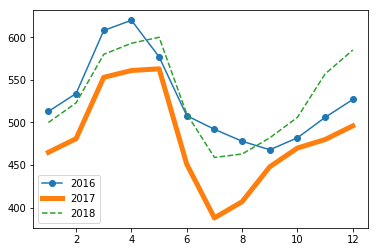

In [127]:
# Сравнение помесячной динамики продаж в годах (используем линейную диаграмму plot в matplotlib)
#   выделить значения 2016 года точками (marker='o')
#   выделить значения 2017 года толстой линией (linewidth=5)
#   выделить значения 2018 года пунктиром (linestyle='dashed')

plt.plot(data['month'], data['2016'], marker='o')
plt.plot(data['month'], data['2017'], linewidth=5)
plt.plot(data['month'], data['2018'], linestyle='dashed')

plt.legend()

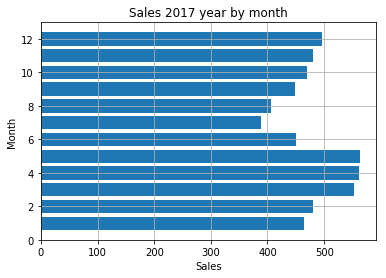

In [128]:
# Построим столбчатую диаграмму распределения помесячных продаж в 2017 году (используем barh в matplotlib)
plt.barh(data['month'], data['2017'])
plt.xlabel('Sales')
plt.ylabel('Month')
plt.title('Sales 2017 year by month')
plt.grid()

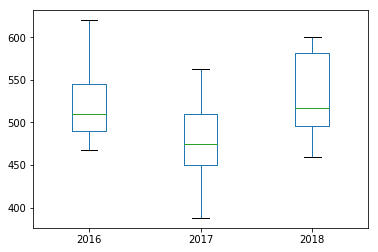

In [153]:
# Построим boxplot распределения продаж по годам.
data.plot(kind='box', x='month')

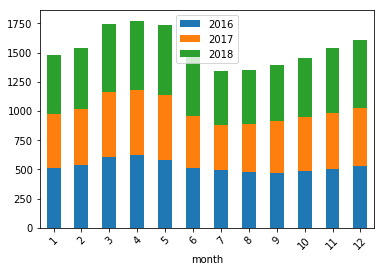

In [139]:
# Сравним помесячную динамику продаж в годах (используем bar_plot)
data.plot(kind='bar', x='month', rot=45, stacked=True)

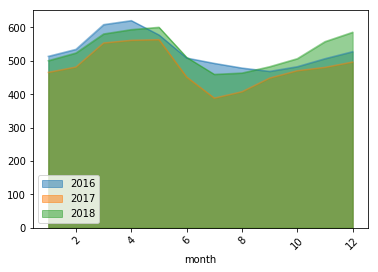

In [140]:
# Сравним помесячную динамику продаж в годах (используем area_plot)
data.plot(kind='area', x='month', rot=45, stacked=False)

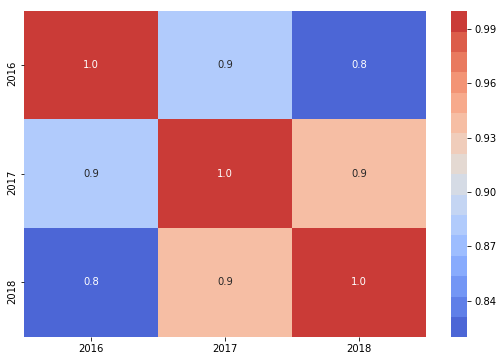

In [173]:
# Корреляция продаж между годами (используем heatmap в seaborn)

import seaborn as sns

# убираем месяц, он не нужен
data_fltr = data.drop('month', axis=1)

# Корреляция в годах - используем data_fltr.corr() -> меняется ось Y (оси Y и X как факторы по годам)
# data_fltr.corr()
    
# меняем цветовую палитру и добавляем значения на heatmap 
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(data_fltr.corr(), annot=True, fmt='.1f', ax=ax, cmap=sns.color_palette('coolwarm', 16))


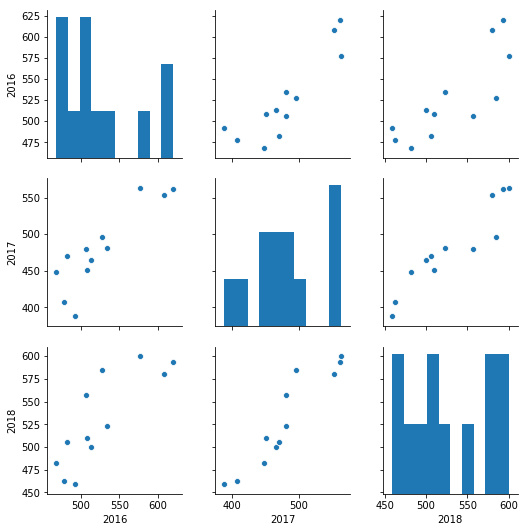

In [174]:
# Как связаны между собой продажи в годах (используем pair plot в seaborn) 

sns_plot = sns.pairplot(
    data_fltr[['2016', '2017', '2018']]);
sns_plot

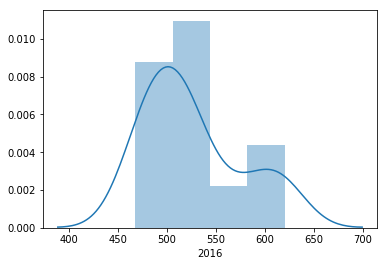

In [177]:
# Распределение продаж по 2016 году (используем distplot в seaborn)

sns.distplot(data_fltr['2016'])

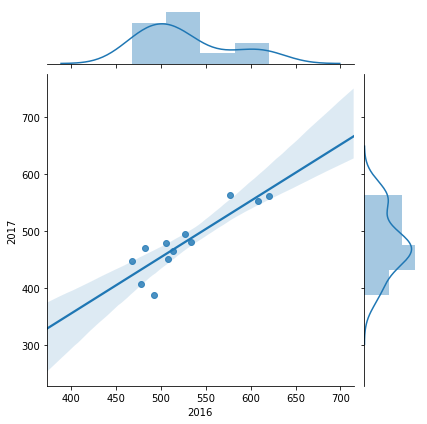

In [179]:
# Посмотрим на то, как связаны между собой продажи 2016 и 2017 годов (используем joint_plot в seaborn)
# (отображаются также гистограммы распределений признаков)

sns.jointplot(x='2016', y='2017', 
              data=data_fltr, kind='reg')